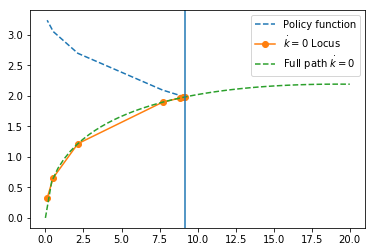

In [3]:
#==========================================================================
        # Time Elimination (Sala-i-Martin and Mulligan 1999) #
#==========================================================================

from scipy.integrate import ode, solve_ivp
import numpy as np
import matplotlib.pyplot as plt

# Policy Function
def cprime(ssd, c, rho, cs, a, ks, theta, delta):
    k = ks-ssd
    
    if k == ks:
        return 0.5*(rho+np.sqrt(rho*rho+4*cs*(1-a)*a*(ks**(a-2))/theta));
    else:
        return c*(rho+delta-a*(k**(a-1)))/(theta*((k**a)-c-delta*k))


# Parameters
n = 0.014
d = 0.10
delta = n + d
p = 0.065
theta = 2
a = 0.5
rho = p - n

# Steady states
ks = (a/(rho+delta))**(1/(1-a))
cs = (ks**a - delta*ks)

# Find policy function
k0 = ks/80
kf = ks

ssdf = ks-kf
ssd0 = ks-k0

c = solve_ivp(fun=lambda t, y: cprime(t, y, rho, cs, a, ks, theta, delta),t_span=[ssdf,ssd0],y0=[cs],method = 'RK45')

cpath = c.y
cpath = cpath.T
ssd = c.t

k = ks-ssd

# Functions of k
y = k**a
s = (y-cpath)/y
ys = ks**a
kdotis0 = y-delta*k


kn = np.linspace(0, 20)
kndot = kn**a - delta*kn

fig = plt.subplot()

plt.plot(k,cpath,'--',label = 'Policy function')
plt.plot(k,kdotis0, '-o',label = r'$\dot{k} = 0$ Locus')
plt.plot(kn,kndot, '--',label = r'Full path $\dot{k} = 0$')
plt.axvline(ks)
plt.legend(loc = 'best')
plt.show()